# *Oryctolagus cuniculus* - Králík divoký

## zpracoval: *Alexander Nagy*


<img src = "http://www.warrenphotographic.co.uk/photography/bigs/25761-Mother-rabbit-and-babies-white-background.jpg" width = 100% alt="http://www.warrenphotographic.co.uk/photography/bigs/25761-Mother-rabbit-and-babies-white-background.jpg">

### Úvodní slovo o králíku ###

Citováno z: http://www.biolib.cz/cz/taxon/id31923/

---------------------------------------------------------------------------

**Říše:** Animalia - živočichové

**Kmen:** Chordata - strunatci

**Třída:** Mammalia - savci

**Řád:** Lagomorpha - zajíci

**Čeleď:** Laporidae - zajícovití

**Rod:** Oryctolagus - králík

---------------------------------------------------------------------------

**Velikost**: Hmotnost jedinců se pohybuje v rozmezí 1,3 - 2,5 kg. Délka těla od 38 - 55 cm.

**Popis:** V porovnání se zajícem Lepus europaeus je králík mnohem menší, má zakulacenou hlavu, zavalitější tělo a kratší uši bez koncových černých skvrn. Silnější přední končetiny slouží i ke hrabání. Ve zbarvení převládá šedý, hnědošedý nebo slabě modrošedý odstín, na břiše je světlejší. V přírodě králíka snadno poznáme podle krátkého, naspodu čistě bílého ocasu.

**Rozšíření:** Pochází ze západního Středomoří (Pyrenejského poloostrova a přilehlé severní Afriky), později byl vysazen na různých místech Evropy (dnes chybí na Islandu, ve Skandinávie a Finsku a na jihovýchodě kontinentu), a také v Austrálii, na Novém Zélandu, v Americe a na četných ostrovech.
(Bližší informace na http://www.iucnredlist.org/details/41291/0.)

---------------------------------------------------------------------------

Citováno z: http://www.mlsnykralik.cz/zivot-kralika-divokeho-v-prirode/

---------------------------------------------------------------------------

**Králík v přírodě:** Králík divoký obývá teplé nížiny. Nevyskytuje se nad 700 m.n.m. Králíci žijí v organizovaných koloniích čítajících i několik desítek králíků. Králíci nejraději budují své kolonie v křovinatých okrajích lesů a polí. Protože žijí v norách, mají v oblibě lehce propustnou půdu, kde se jim nory dobře hloubí. Nemají rádi vlhké oblasti. Nejaktivnější jsou králíci za svítání a hlavně za soumraku, kdy v okolí svých nor spásají rostliny. Pokud králíka neuloví některý z jeho nepřátel, může se dožít až 9 let.

**Rozmnožování:** Systém námluv a páření není u králíků jednoduchý. Dominantní samci mají obvykle více samic, zatímco v hierarchii níže postavení samci jsou monogamní. Rozmnožovací období králíků trvá od konce února do října. Samice mají tzv. provokovanou ovulaci. Vajíčko sestoupí až při samotném páření. Samice je březí cirka 30 dnů. Samice vrhá 3  -5 krát ročně. V teplejších krajích může mít ale až 7 vrhů za rok. Mláďata rodí do speciální nory, jejíž konec je vystlaný vlastní srstí. Králík divoký je "altriciální“ a rodí holé a slepé mláďata. Až za 10 dnů otevřou malí králíci očka. V jednom vrhu je 4 - 8 mláďat. Když králice opustí noru a jde shánět potravu, zahrabe vchod do nory a označkuje ho močí. 

---------------------------------------------------------------------------

### Zajímavosti: ###

**- Největší králík na světě**

Největším králíkem na světě byl v roce 2010 Darius. S délkou 130 cm a hmotností 22 kg.
(https://www.novinky.cz/koktejl/199054-nejvetsi-kralik-na-svete-meri-130-centimetru-a-vazi-pres-22-kilogramu.html)


<img src="http://img.cncenter.cz/img/3/article/1975121_kralik-velikonoce.jpg" width=80% alt="http://img.cncenter.cz/img/3/article/1975121_kralik-velikonoce.jpg" >

**- **Další zajímavost, která stojí za zmínku je, že i přes dlouholetou snahu člověka vyšlechtit různé barevné varianty králíka, je tato snaha během pouhých několika generací naprosto anulována. Pokud šlechtěný králík uprchne do volné přírody, přežije a začlení se do existující populace divokých králíků, tak jím nesené alely se nemají šanci prosadit a ovlivnit populaci divokých králíků.

### Úprava vstupních dat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import pylab as pl
import re

In [2]:
genes=pd.read_table('D:\Programing\Projekt\Kralik_chr_gene.gtf', header=None, dtype={0:np.object})
genes.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [3]:
transcripts=pd.read_table('D:\Programing\Projekt\Kralik_chr_transcript.gtf', header=None, dtype={0:np.object})
transcripts.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [4]:
def parse_attributes(attributes_str):
    """Načte obsah sloupce attribute jako `dict`.
    
    - Pozor, neporadí si se středníky v hodnotách a očekává uvozovky
      kolem každé hodnoty.
      
      
    Parametry:
    
    `attributes_str` - hodnota GTF sloupce attribute jako string
    """
    ONLY_ATTRIBUTES = set(["gene_id", 
                          "transcript_id",
                          "gene_name",
                          "gene_biotype",
                          "transcript_name",
                          "transcript_biotype"])
    
    out = {}
    
    for pair in attributes_str.split(";"):
        if pair.strip() == "":
            continue
        m = re.match(r"^\s*(.+) \"(.+)\"$", pair)
        
        if m.group(1) in ONLY_ATTRIBUTES:
            out[m.group(1)] = m.group(2)

    return out

s = """gene_id "ENSG00000241860"; gene_version "6"; transcript_id "ENST00000484859"; transcript_version "1"; gene_name "RP11-34P13.13"; gene_source "havana"; gene_biotype "processed_transcript"; havana_gene "OTTHUMG00000002480"; havana_gene_version "3"; transcript_name "RP11-34P13.13-004"; transcript_source "havana"; transcript_biotype "antisense"; havana_transcript "OTTHUMT00000007035"; havana_transcript_version "1"; tag "basic"; transcript_support_level "5";"""
parse_attributes(s)

{'gene_biotype': 'processed_transcript',
 'gene_id': 'ENSG00000241860',
 'gene_name': 'RP11-34P13.13',
 'transcript_biotype': 'antisense',
 'transcript_id': 'ENST00000484859',
 'transcript_name': 'RP11-34P13.13-004'}

In [5]:
def split_attribute_column(df):
    """Rozdělí sloupec `attribute` data frame GTF souboru do vlastních
    sloupců.
    """
    attributes_columns = df.attribute.apply(parse_attributes).apply(pd.Series)
    return pd.concat([df.drop(["attribute"], axis=1),
                      attributes_columns],
                     axis=1)

genes = split_attribute_column(genes)
transcripts = split_attribute_column(transcripts)

*** Kontrola správné úpravy vstupních dat ***

In [6]:
genes.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
0,1,ensembl,gene,11369,33974,.,+,.,protein_coding,ENSOCUG00000014251,WDR31
1,1,ensembl,gene,52453,53037,.,+,.,protein_coding,ENSOCUG00000005054,RNF183
2,1,ensembl,gene,56534,74905,.,-,.,protein_coding,ENSOCUG00000005046,PRPF4
3,1,ensembl,gene,75200,85748,.,+,.,protein_coding,ENSOCUG00000005044,CDC26
4,1,ensembl,gene,88306,106911,.,-,.,protein_coding,ENSOCUG00000005040,SLC31A1


In [7]:
transcripts.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
0,1,ensembl,transcript,11369,33974,.,+,.,protein_coding,ENSOCUG00000014251,WDR31,protein_coding,ENSOCUT00000014253,WDR31-201
1,1,ensembl,transcript,52453,53037,.,+,.,protein_coding,ENSOCUG00000005054,RNF183,protein_coding,ENSOCUT00000005053,RNF183-201
2,1,ensembl,transcript,56534,74905,.,-,.,protein_coding,ENSOCUG00000005046,PRPF4,protein_coding,ENSOCUT00000005046,PRPF4-201
3,1,ensembl,transcript,75200,85748,.,+,.,protein_coding,ENSOCUG00000005044,CDC26,protein_coding,ENSOCUT00000005041,CDC26-201
4,1,ensembl,transcript,88306,106911,.,-,.,protein_coding,ENSOCUG00000005040,SLC31A1,protein_coding,ENSOCUT00000005039,SLC31A1-201


Kontrola zdroje vstupních dat

In [8]:
genes["source"].unique()

array(['ensembl'], dtype=object)

In [9]:
transcripts["source"].unique()

array(['ensembl'], dtype=object)

Potvrzení původu dat z databáze Ensembl. Prohnáním "ensembl oryctolagus cuniculus" přes internetový vyhledávač jsem nalezl mezi výsledky vyhledávání odkaz http://www.ensembl.org/Oryctolagus_cuniculus/Info/Annotation . Je zde možnost ověřit správnost (přesnost) výsledků získaných mnou níže provedenými výpočty.

<img src="https://photos.smugmug.com/Mammals/Misc/i-QFM6t3X/0/XL/RO0A3594_smv1200-XL.jpg" width=80%>

### Analýza dat ###

**Osnova:**
1. Počet identifikovaných sekvencí v genomu králíka.
2. Celkový počet genů.
3. Jaké má genotyp králíka typy kódujících genů?
4. Kolik je genů v jednotlivých genových typech?
    4. Graf četností genových typů.
5. Jaké jsou rozdíly v délkách jednotlivých typů genů?
    5. Legenda
    6. Boxplot snRNA a rRNA.
6. Kolik genů se nachází na řetězci +/-?
7. Kolik genů nemá název?
    7. Ukázka nepojmenovaných genů.
8. Kolik genů má název?
    8. Kontrola správnosti výpočtu.
9. Geny s unikátním názvem.
10. Kolik má králík divoký transkriptů?
11. Jaké má typy transkriptů?
12. Typy transkriptů a jejich počet.
13. Rozdíly délek jednotlivých typů transkriptů.
    13. Legenda
	14. Boxplot transkriptů snRNA a rRNA
14. Kolik transkriptů se nachází na +/- řetězci?
15. Počet transkriptů bez názvu.
   	15. Příklady nepojmenovaných transkriptů.
16. Transkripty s názvem.
 	16. Kontrola správnosti výpočtu.
17. Transkripty s unikátním názvem.

** 1. Počet identifikovaných sekvencí v genomu králíka **

In [10]:
len(genes["seqname"].unique())

23

** 2. Celkový počet genů.**

In [11]:
len(genes)

17434

** 3. Jaké jsou v genotypu typy kódujících genů? **

In [12]:
genes_coding_type = genes["gene_biotype"].value_counts().index.tolist()
genes_coding_type

# Načte ze souboru hodnoty ze sloupce 'gene_biotype'.
# Vyfiltruje je a poté z nich sestaví seznam, jak jsou popoadě v souboru.
# http://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts

['protein_coding',
 'snRNA',
 'snoRNA',
 'pseudogene',
 'rRNA',
 'miRNA',
 'misc_RNA',
 'processed_pseudogene',
 'Mt_tRNA',
 'Mt_rRNA']

** 4. Kolik je genů v jednotlivých genových typech? **

In [13]:
genes_coding_type = genes["gene_biotype"].value_counts()
genes_coding_type

# Jednodušší verze příkazu výš.
# Udává množství jednotlivých biotypů.
# Sloupec vlevo = co protein kóduje / sloupec vpravo = množství daných genů

protein_coding          13913
snRNA                     839
snoRNA                    803
pseudogene                683
rRNA                      419
miRNA                     404
misc_RNA                  263
processed_pseudogene       86
Mt_tRNA                    22
Mt_rRNA                     2
Name: gene_biotype, dtype: int64

** A. Graf četnosti genových typů. **

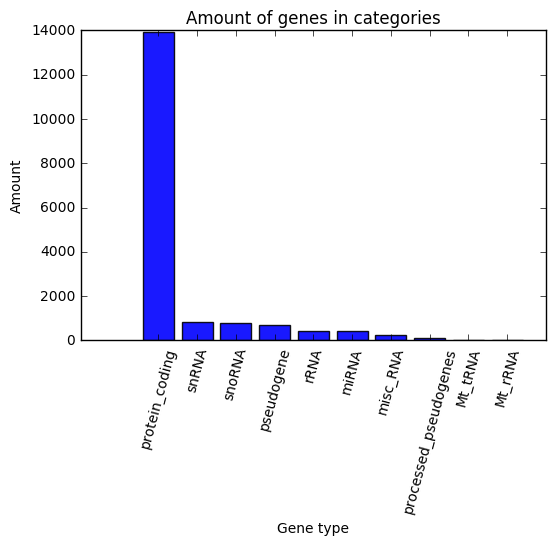

In [14]:
y_pos = np.arange(10)
plt.bar(y_pos, genes_coding_type,align='center', alpha=0.9) 
plt.xticks(y_pos, ["protein_coding","snRNA","snoRNA","pseudogene","rRNA","miRNA","misc_RNA","processed_pseudogenes","Mt_tRNA","Mt_rRNA"])
plt.ylabel('Amount')
plt.xlabel("Gene type")
plt.title('Amount of genes in categories')
for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xticks(ax.get_xticks(), rotation=75)
plt.show()

# np.arange - určí počet sloupců v grafu
# umístění sloupce + barva
# popisky sloupců
# popis osy Y
# popis osy X
# název grafu

#rotace popisek
#ukázat graf

** 5. Rozdíly v délkách jednotlivých typů genů.**

In [15]:
genes["length"] = genes["end"]-genes["start"]
print(genes.groupby(["gene_biotype"])["length"].describe().to_string())

# na konec "print(---.groupby(["..."])["..."]. ...().to_string())
# .to_string pro převedení float na str
# http://bconnelly.net/2013/10/summarizing-data-in-python-with-pandas/

gene_biotype               
Mt_rRNA               count    2.000000e+00
                      mean     1.267000e+03
                      std      4.398204e+02
                      min      9.560000e+02
                      25%      1.111500e+03
                      50%      1.267000e+03
                      75%      1.422500e+03
                      max      1.578000e+03
Mt_tRNA               count    2.200000e+01
                      mean     6.740909e+01
                      std      3.126828e+00
                      min      5.800000e+01
                      25%      6.600000e+01
                      50%      6.800000e+01
                      75%      6.875000e+01
                      max      7.400000e+01
miRNA                 count    4.040000e+02
                      mean     9.044307e+01
                      std      1.996335e+01
                      min      5.000000e+01
                      25%      7.900000e+01
                      50%      8.700000e+01
    

LEGENDA:

count = počet

mean = průměr

std = odchylka

min = minimum

25/50/75% = jednotlivé kvartily

max = maximum

** A. Boxplot porovnání délky sekvencí snRNA a rRNA.**

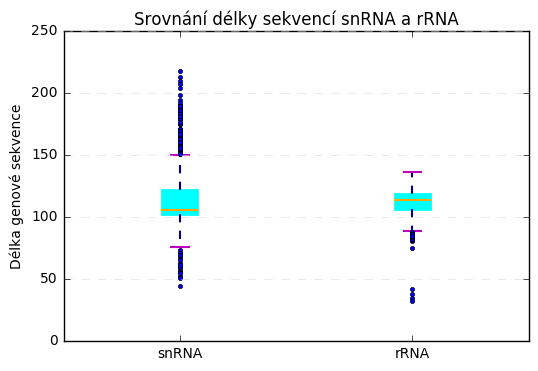

In [40]:
len_snRNA=genes[genes["gene_biotype"]=="snRNA"].length
len_rRNA=genes[genes["gene_biotype"]=="rRNA"].length
x1=len_snRNA.tolist()
x2=len_rRNA.tolist()
x=[x1,x2]

plot_box_1=plt.boxplot(x, vert=True, patch_artist=True)
plt.setp(plot_box_1['boxes'],color='Cyan',linewidth=2,facecolor='DarkBlue')
plt.setp(plot_box_1['whiskers'], color='DarkBlue', linewidth=1.5) 
plt.setp(plot_box_1['caps'], color='M', linewidth=1.5)  
plt.setp(plot_box_1['fliers'], marker='o', markersize=3)

plt.setp(plot_box_1['medians'], color='Orange', linewidth=1.5)
# označení průměrné hodnoty + šířka čáry

plt.grid(axis='y', linestyle='--', which='major', color='lightgrey', alpha=0.7)
plt.xticks([1, 2], ["snRNA", "rRNA"])
# počet sloupců + popisky

plt.ylabel('Délka genové sekvence') 
plt.title('Srovnání délky sekvencí snRNA a rRNA')
plt.show()

** 6. Kolik genů se nachází na + / - řetězci? **

In [18]:
strand_genes_amount = genes["strand"].value_counts()
strand_genes_amount

-    8772
+    8662
Name: strand, dtype: int64

** 7. Geny bez názvu. **

In [19]:
noname_genes = genes["gene_name"].isnull().values.sum()
print("Počet genů bez názvu: ", noname_genes)

Počet genů bez názvu:  6570


** A. Ukázka nepojmenovaných genů. **

In [20]:
# print(genes["gene_name"].isnull())

In [21]:
genes[5:6]

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,length
5,1,ensembl,gene,126038,162795,.,+,.,protein_coding,ENSOCUG00000005028,NaN,36757


In [22]:
genes[8:9]

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,length
8,1,ensembl,gene,367324,372684,.,+,.,protein_coding,ENSOCUG00000026544,NaN,5360


** 8. Geny s názvem. **

In [23]:
genes_with_name = genes["gene_name"].notnull().values.sum()
print("Počet genů s názvem: ", genes_with_name)

Počet genů s názvem:  10864


** Kontrola správnosti výpočtu. **

In [24]:
noname_genes + genes_with_name == len(genes)

True

** 9. Geny s unikátním názvem. **

In [25]:
genes_with_unique_name = genes["gene_name"].nunique()
print("Počet genů s unikátním názvem: ", genes_with_unique_name)

Počet genů s unikátním názvem:  10445


<img src="http://www.zelenyhajsmidary.estranky.cz/img/mid/181/6.jpg" width=50% 
alt="http://www.zelenyhajsmidary.estranky.cz/img/mid/181/6.jpg">

** 10. Kolik má králík divoký transkriptů? **

In [26]:
len(transcripts)

18386

** 11. Typy transkriptů v genomu. **

In [27]:
transcripts_type = transcripts["transcript_biotype"].value_counts().index.tolist()
transcripts_type

['protein_coding',
 'snRNA',
 'snoRNA',
 'pseudogene',
 'rRNA',
 'miRNA',
 'misc_RNA',
 'processed_pseudogene',
 'Mt_tRNA',
 'Mt_rRNA']

** 12. Typy transkriptů a jejich počet. **

In [28]:
transcripts_type = transcripts["transcript_biotype"].value_counts()
transcripts_type

protein_coding          14865
snRNA                     839
snoRNA                    803
pseudogene                683
rRNA                      419
miRNA                     404
misc_RNA                  263
processed_pseudogene       86
Mt_tRNA                    22
Mt_rRNA                     2
Name: transcript_biotype, dtype: int64

** 13. Rozdíly délek jednotlivých typů transkriptů.**

In [29]:
transcripts["length"]=transcripts["end"]-transcripts["start"]
print(transcripts.groupby(["transcript_biotype"])["length"].describe().to_string())

transcript_biotype         
Mt_rRNA               count    2.000000e+00
                      mean     1.267000e+03
                      std      4.398204e+02
                      min      9.560000e+02
                      25%      1.111500e+03
                      50%      1.267000e+03
                      75%      1.422500e+03
                      max      1.578000e+03
Mt_tRNA               count    2.200000e+01
                      mean     6.740909e+01
                      std      3.126828e+00
                      min      5.800000e+01
                      25%      6.600000e+01
                      50%      6.800000e+01
                      75%      6.875000e+01
                      max      7.400000e+01
miRNA                 count    4.040000e+02
                      mean     9.044307e+01
                      std      1.996335e+01
                      min      5.000000e+01
                      25%      7.900000e+01
                      50%      8.700000e+01
    

**LEGENDA:**

count = počet

mean = průměr

std = odchylka

min = minimum

25/50/75% = jednotlivé kvartily

max = maximum

** Boxplot transkriptů snRNA a rRNA **

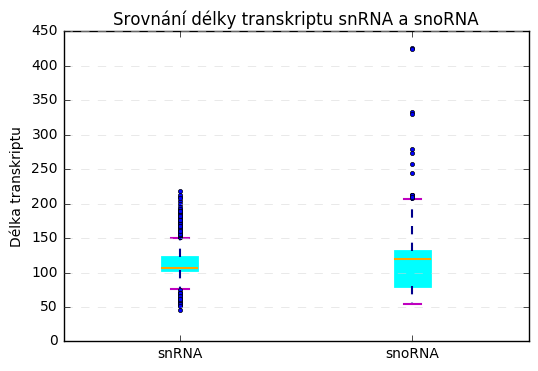

In [46]:
len_snRNA=transcripts[transcripts["transcript_biotype"]=="snRNA"].length
len_snoRNA=transcripts[transcripts["transcript_biotype"]=="snoRNA"].length
z1=len_snRNA.tolist()
z2=len_snoRNA.tolist()
z=[z1,z2]

plot_box_1=plt.boxplot(z, vert=True, patch_artist=True)
plt.setp(plot_box_1['boxes'],color='Cyan',linewidth=2,facecolor='DarkBlue')
plt.setp(plot_box_1['whiskers'], color='DarkBlue', linewidth=1.5) 
plt.setp(plot_box_1['caps'], color='M', linewidth=1.5)  
plt.setp(plot_box_1['fliers'], marker='o', markersize=3)

plt.setp(plot_box_1['medians'], color='Orange', linewidth=1.5)
# označení průměrné hodnoty + šířka čáry

plt.grid(axis='y', linestyle='--', which='major', color='lightgrey', alpha=0.7)
plt.xticks([1, 2], ["snRNA", "snoRNA"])
# počet sloupců + popisky

plt.ylabel('Délka transkriptu') 
plt.title('Srovnání délky transkriptu snRNA a snoRNA')
plt.show()

** 14. Kolik transkriptů se nachází na + / - řetězci? **

In [30]:
strand_transcripts_amount = transcripts["strand"].value_counts()
strand_transcripts_amount

-    9243
+    9143
Name: strand, dtype: int64

** 15. Počet transkriptů bez názvu. **

In [31]:
noname_transcripts = transcripts["transcript_name"].isnull().values.sum()
print("Počet transkriptů bez názvu: ", noname_transcripts)

Počet transkriptů bez názvu:  6716


** A. Příklady nepojmenovaných transkriptů. **

In [32]:
# print(transcripts["transcript_name"].isnull())

In [33]:
transcripts[5:6]

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name,length
5,1,ensembl,transcript,126038,162795,.,+,.,protein_coding,ENSOCUG00000005028,NaN,protein_coding,ENSOCUT00000005032,NaN,36757


In [34]:
transcripts[17:18]

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name,length
17,1,ensembl,transcript,1290346,1290646,.,-,.,protein_coding,ENSOCUG00000021292,NaN,protein_coding,ENSOCUT00000025822,NaN,300


** 16. Transkripty s názvem. **

In [36]:
transcripts_with_name = transcripts["transcript_name"].notnull().values.sum()
print("Počet transkriptů s názvem je: ", transcripts_with_name)

Počet transkriptů s názvem je:  11670


** Kontrola správnosti výpočtu. **

In [37]:
noname_transcripts + transcripts_with_name == len(transcripts)

True

** 17. Transkripty s unikátním názvem. **

In [39]:
transcripts_unique = transcripts["transcript_name"].nunique()
print("Počet transkriptů s unikátním názvem je: ", transcripts_unique)

Počet transkriptů s unikátním názvem je:  11251


# Konec prezentace. Děkuji za pozornost!

<img src = "http://wonderopolis.org/wp-content/uploads/2011/04/rabbit-on-white-background_shutterstock_64146802.jpg" width=50% alt = "http://wonderopolis.org/wp-content/uploads/2011/04/rabbit-on-white-background_shutterstock_64146802.jpg"> 